In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 36kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=8cfe91972bbc364d061128f26f0c6460bffb4396b4594afd86ffb9c6a9125f3d
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from google.colab import drive
drive.mount('/gdrive/')


Mounted at /gdrive/


In [ ]:
cd /gdrive/Shareddrives/"Halal Private's club"/Reconaissance_Faciale/Images


/gdrive/Shareddrives/Halal Private's club/Reconaissance_Faciale/Images


In [ ]:
ls

tablawi.jpg  test2.jpg  test4.jpg  test6.jpg
test1.jpg    test3.jpg  test5.jpg  test.jpg


In [ ]:
#opencv est la librarie qui nous permet de modifier les images
import cv2
#numpy est une librarie très avancé de maths
import numpy
#patch pour afficher les images
from google.colab.patches import cv2_imshow
#module de reconaissance faciale
import face_recognition



In [ ]:
print('Welcome to face recognzier v0.1')
#version fichier de l'image
chosen_image = str(input('Entrez le nom de l"image et son extension (exemple : "test1.jpg" : '))
#version opencv de l'image (mathematique)
cv2_img = cv2.imread(chosen_image)

Welcome to face recognzier v0.1
Entrez le nom de l"image et son extension (exemple : "test1.jpg" : test1.jpg


voici l'image choisi : 


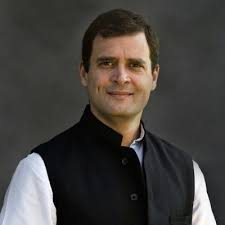

In [ ]:
#Chargement de l'image
print("voici l'image choisi : ")
#fonction patchée pour affciher l'image
cv2_imshow(cv2_img)

In [ ]:
#chargement de l'image dans le module de reconaissance faciale
loaded_img = face_recognition.load_image_file(chosen_image)

In [ ]:
#definit la position du visage par rapport a l'image (definit un carre)
loc_img = face_recognition.face_locations(loaded_img)

#voici la valeur de loc_img
print(loc_img)
#l'image est situé dans un carre qui se trouve a x du haut de l'image , a y de la droite de l'image etc
#il definit les 4 points du carre

[(47, 154, 121, 79)]


In [ ]:
#ici on extrait les valeurs points puisqu'ils ne sont pas dans l'ordre dont on a besoin dans la variable loc_img
import re
loc_str = str(loc_img)
print(loc_str)
temp = re.findall(r'\d+', loc_str) 
res = list(map(int, temp)) 
print("The numbers list is : " + str(res)) 
print(str(res[3]) + " " + str(res [0]) + " " + str(res[1]) + " " + str(res[2]))

[(47, 154, 121, 79)]
The numbers list is : [47, 154, 121, 79]
79 47 154 121


In [ ]:
#definition des variables (je dois le refaire)
first = int(res[3])
second = int(res[0])
third = int(res[1])
fourth = res[2]
#on ajoute rectangle autour du visage avec les coordonnées qu'on a recupere dans loc_img
cv2.rectangle(cv2_img ,(first, second), (third, fourth), (255, 0, 0), 5)
cv2.putText(cv2_img, 'Face Detected', (third, second -10), cv2.FONT_HERSHEY_COMPLEX,0.5, (255,255,255), 2)

array([[[ 58,  63,  62],
        [ 57,  62,  61],
        [ 57,  62,  61],
        ...,
        [ 52,  53,  51],
        [ 52,  53,  51],
        [ 52,  53,  51]],

       [[ 58,  63,  62],
        [ 57,  62,  61],
        [ 57,  62,  61],
        ...,
        [ 52,  53,  51],
        [ 52,  53,  51],
        [ 52,  53,  51]],

       [[ 58,  63,  62],
        [ 57,  62,  61],
        [ 57,  62,  61],
        ...,
        [ 52,  53,  51],
        [ 52,  53,  51],
        [ 52,  53,  51]],

       ...,

       [[193, 169, 163],
        [192, 168, 162],
        [207, 183, 177],
        ...,
        [ 45,  43,  42],
        [ 46,  44,  43],
        [ 47,  46,  42]],

       [[192, 168, 162],
        [190, 166, 160],
        [216, 192, 186],
        ...,
        [ 43,  39,  38],
        [ 42,  41,  37],
        [ 49,  46,  42]],

       [[189, 168, 160],
        [188, 167, 159],
        [236, 215, 207],
        ...,
        [ 45,  40,  37],
        [ 47,  44,  40],
        [ 49,  44,  41]]

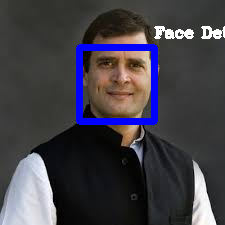

In [ ]:

#on affiche ensuite l'image avec le visage détécté
cv2_imshow(cv2_img)

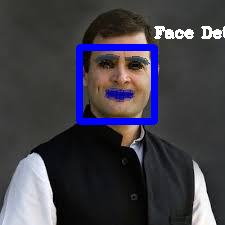

In [ ]:
#je peux aussi detecter les parties du visgae
face_landmarks_list = face_recognition.face_landmarks(cv2_img)

In [ ]:
#les differentes parties du visage
face_landmarks_list

In [ ]:
# Fonction test de maquillage (en development)
from PIL import Image, ImageDraw
def Make_UP(face_landmarks_list, image):
  pil_image = Image.fromarray(image)
  for face_landmarks in face_landmarks_list:
      d = ImageDraw.Draw(pil_image, 'RGBA')

      # Make the eyebrows into a nightmare
      d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
      d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
      d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
      d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

      # Gloss the lips
      d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
      d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
      d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
      d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

      # Sparkle the eyes
      d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
      d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

      # Apply some eyeliner
      d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
      d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

      tes_pil = numpy.array(pil_image)
      # Convert RGB to BGR 
      # tes_pil = tes_pil[:, :, ::-1].copy() 
      return tes_pil

cv2_imshow(Make_UP(face_landmarks_list, cv2_img))